## Visialization in Python
Line plot - trending <br>


In [ ]:
#方程式的使用：
对x的设定 X = np.arange(-5.0,5.0,0.1)
对y的设定
y = np.power(x1,x2) #x1中的所有元素 乘以x2次方
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y = np.exp(X)
y = log(X)

### Instance: reading excel doc

In [2]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [94]:
#Read data into Pandas Dataframe
#xrld required to extract data from Excel spreadsheet files
!pip install xlrd

In [95]:
df_can = pd.read_excel('http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [96]:
#We can use dtypes to define inavailable data, it turn out AREA, REG, DEV are int64

#The data stored in Pandas limited to float, int, bool, datetime64, timedelta, category and object(str). int64 and int32 is not available.

#use drop() to clean the data
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


In [97]:
#Rename the columns
#{} means dictionary
df_can.rename(columns = {'OdName':'Country','AreaName':'Continent','RegName':'Region'}, inplace=True)
df_can.head(2)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


In [98]:
#新建一列为了总和
df_can['Total'] = df_can.sum(axis=1)
#df_can.head(2)

#检查是否含有null值
#df_can.isnull().sum()

1.2呼叫列的方法： <Br>
- df.Country #return a series <br>
- df['columnname1', 'columnname2','columnname3' ... ] #return df 

In [14]:
df_top5 = df_can.head()

In [9]:
#Use sort_values to 排序
df_can.sort_values(['Total'], ascending = False, axis = 0, inplace=True)

1.3Select rows <br>
- df.loc[label] <br>
- df.iloc[index] #difficult to find corelated numeric index, so we need to use set_index() <br>
- df_can.index[df_can['Afghanistan'] == True].tolist()

In [10]:
#将country写成index
df_can.set_index('Country', inplace=True)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [16]:
#view the number of immigrants from Japan (row 87) for the following scenarios: 1. The full row data (all columns)  

#print(df_can.iloc[87])
print(df_can.loc['Japan',:])

Continent                 Asia
Region            Eastern Asia
DevName      Developed regions
1980                       701
1981                       756
1982                       598
1983                       309
1984                       246
1985                       198
1986                       248
1987                       422
1988                       324
1989                       494
1990                       379
1991                       506
1992                       605
1993                       907
1994                       956
1995                       826
1996                       994
1997                       924
1998                       897
1999                      1083
2000                      1010
2001                      1092
2002                       806
2003                       817
2004                       973
2005                      1067
2006                      1212
2007                      1250
2008                      1284
2009    

In [ ]:
#2. For year 2013
#print(df_can.loc['Japan', 2013]) 可行
print(df_can.iloc[87,36])

In [99]:
#3. For years 1980 to 1985
#print(df_can.loc['Japan', [1980, 1981, 1982, 1983, 1984, 1984]]) 可行
#print(df_can.iloc[87,[3,4,5,6,7,8]])

#设置一个新的List把年份从int改为string, 避免将年份误判为index
df_can.columns = list(map(str,df_can.columns))

In [ ]:
#DO NOT RUN!
#df_can.set_index('Country', inplace=True) #Set the columns as index进行此次操作之后需要重置df
#df_can.index_reset()

### Instance of filtering data

In [ ]:
condition = df_can['Continent'] == 'Asia'
df_can[condition].head()

In [ ]:
#Filter based on multiple conditions
df_can[(df_can['Continent']=='Asia') & (df_can['Region']=='Southern Asia')].head(2)
#insert condition into df to execute the filter

### Visializationn

### Instance: Plot a line graph of immigration from Haiti using df.plot().

In [30]:
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [17]:
haiti = df_can.loc['Haiti', years] # passing in years 1980 - 2013 to exclude the 'total' column
haiti.head()
#Error: the index of years(object) brings mistake, df_can.columns = list(map(str,df_can.columns))

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

In [4]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

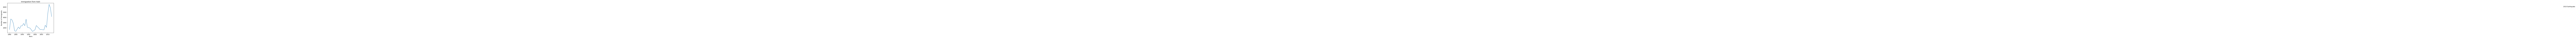

In [18]:
#Create plot, add title, label, and annotate by using plt.text(x,y, label) to add text
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

# annotate the 2010 Earthquake. 
# syntax: plt.text(x, y, label)
plt.text(2000, 6000, '2010 Earthquake') # see note below

plt.show() 

### Create Area Plot
Area plot可以将原表格（横坐标：国家，纵坐标年份）改为 - 横坐标 年份，纵坐标 移民人数，配成一张很想火山图

In [100]:
years = list(map(str, range(1980, 2014)))

df_can.sort_values(['Total'], ascending = False, axis = 0, inplace=True)

df_top5 = df_can.head()
df_top5 = df_top5[years].transpose() #转置
df_top5.head()

,79,36,183,136,130
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


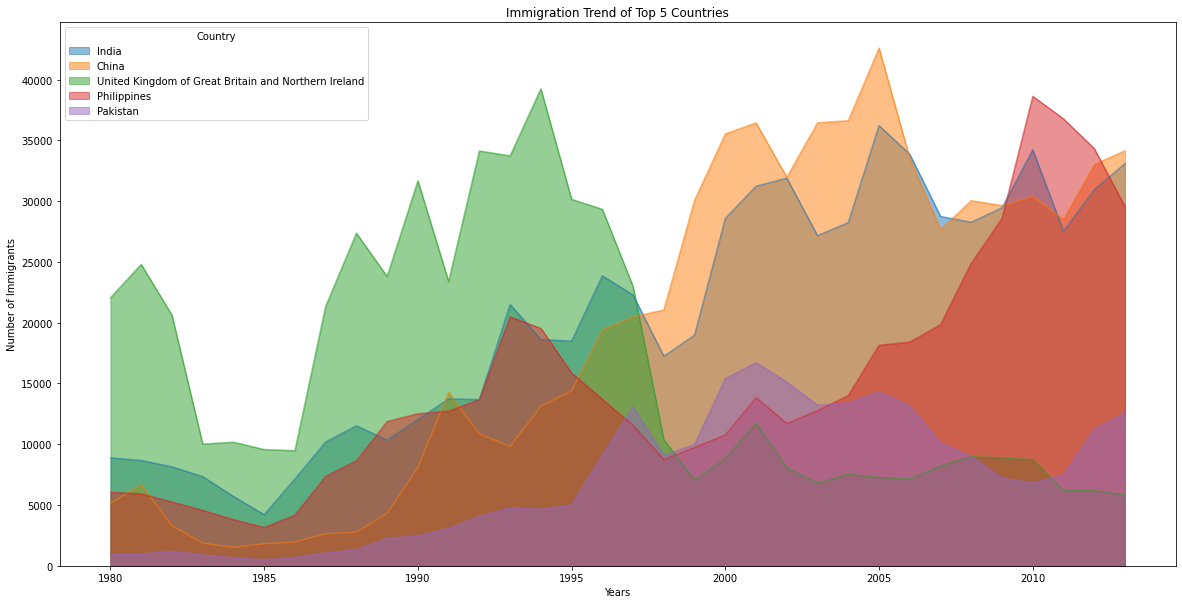

In [17]:
#Call the area plot

df_top5.index = df_top5.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_top5.plot(kind='area', 
             stacked=False,
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

### Instance: Calling histogram
It is a way of representing the frequency distribution of a variable.

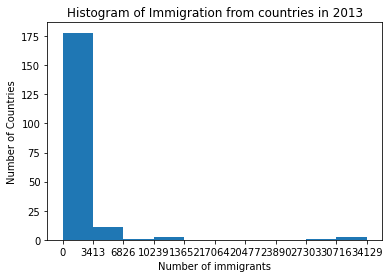

In [18]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import numpy as np 

count, bin_edges = np.histogram(df_can['2013']) #避免数据过大 失焦的问题

df_can['2013'].plot(kind='hist', xticks = bin_edges)

plt.title('Histogram of Immigration from countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of immigrants')

plt.show()

### Instance of Bar Chart
Bar chart is use to compare the values at a given point of time

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt 

years = list(map(str, range(1980,2014)))
df_iceland = df_can.loc['Iceland', years]

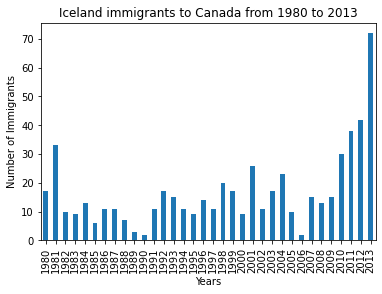

In [24]:
df_iceland.plot(kind='bar')  #try kind='barh'

plt.title('Iceland immigrants to Canada from 1980 to 2013')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

### Instance: Pie Chrt to display percentage of total number of immigrants.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 

In [15]:
df_continents = df_can.groupby('Continent',axis=0).sum()
#the output of the groupby method is a `groupby' object. we can not use it further until we apply a function (eg .sum())

print(type(df_can.groupby('Continent',axis=0)))
df_continents.head(2)

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794


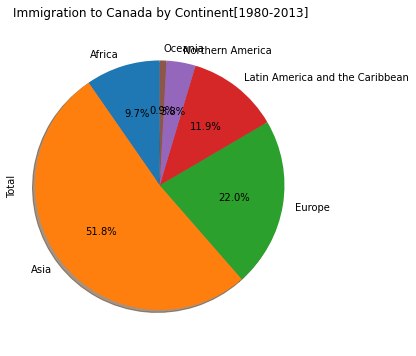

In [18]:
df_continents['Total'].plot(kind="pie", figsize=(5,6), 
autopct='%1.1f%%', #autopct - is a string or function used to label the wedges with their numeric value. 
startangle=90, 
shadow=True)

plt.title('Immigration to Canada by Continent[1980-2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

**Improvements:** <Br>
<br>
1.Remove the text labels on the pie chart by passing in legend and add it as a seperate legend using plt.legend(). <Br>
2.Push out the percentages to sit just outside the pie chart by passing in pctdistance parameter.<br>
3.Pass in a custom set of colors for continents by passing in colors parameter.<br>
4.Explode the pie chart to emphasize the lowest three continents (Africa, North America, and Latin America and Carribbean) by pasing in explode parameter.

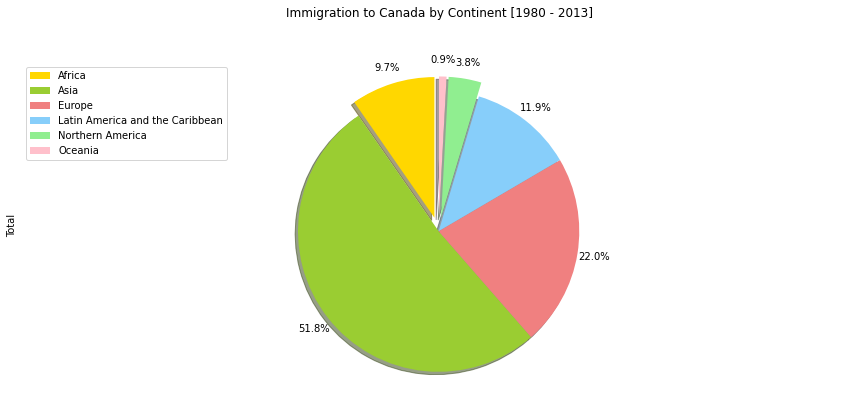

In [28]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12)
plt.axis('equal') 
# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

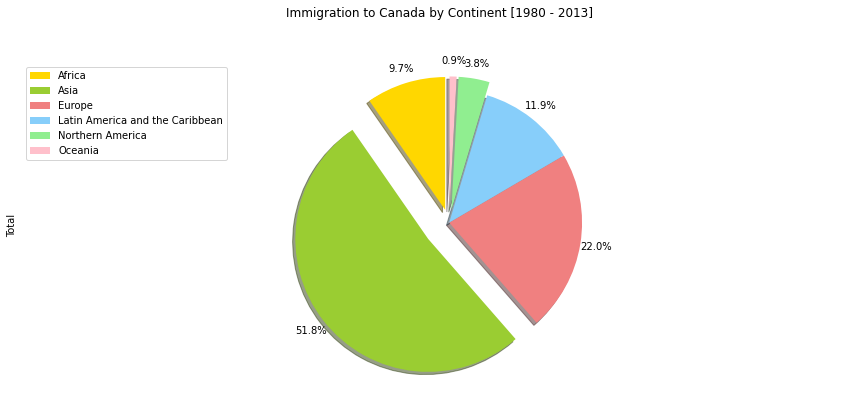

In [26]:
#Remove the text label using the chart. plt.legend()
#push out percentage using pctdistance
#Use colors to pass the demanding color
#Enlarge the chart to view the small value by using explod

colors_list = ['gold','yellowgreen','lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0.2, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None, # turn off labels 
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

A box plot is a way of statistically representing the *distribution* of the data through five main dimensions: 

- **Minimun:** Smallest number in the dataset.
- **First quartile:** Middle number between the `minimum` and the `median`.
- **Second quartile (Median):** Middle number of the (sorted) dataset.
- **Third quartile:** Middle number between `median` and `maximum`.
- **Maximum:** Highest number in the dataset.


In [38]:
<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/boxplot_complete.png" width=440, align="center">

SyntaxError: invalid syntax (<ipython-input-38-48ba2f6c07f8>, line 1)

### Instance of using Boxplot to visialize immigrants from Japan to Canada

### Instance of Subplot to visialize China and Japan new immigrants

To visualize multiple plots together, we can create a figure (overall canvas) and divide it into subplots, each containing a plot.

In [48]:
df_CI = df_can.loc[['China','Japan'], years].transpose()

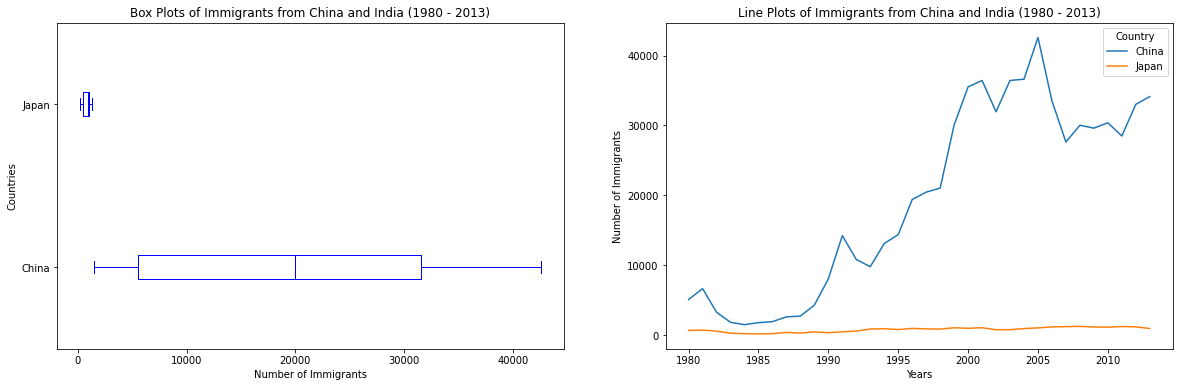

In [49]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

### ScatterPlot visualize the trend of total immigrantion to Canada (all countries combined) for the years 1980 - 2013.

In [63]:
#Since we are expecting to use the relationship betewen years and total population, we will convert years to int type.

# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']
#df_tot.rename(columns = {'index':'year', '0':'total'}, inplace=True)

# view the final dataframe
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


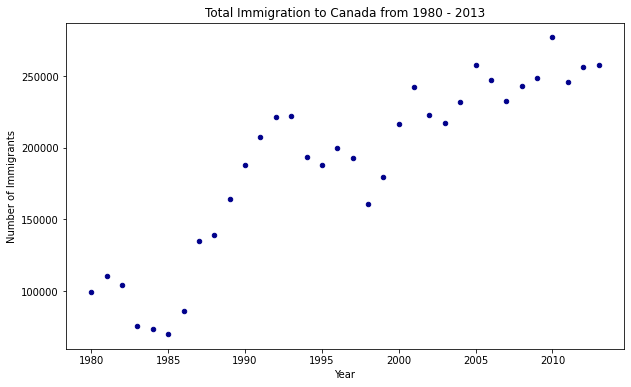

In [64]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

In [65]:
#You could not predict the trending in 2015, let's fit the data into line plot.We can mathematically analyze this upward trend using a regression line (line of best fit)最佳适配线，得到关系方程式

x = df_tot['year']      # year on x-axis
y = df_tot['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

### Draw a scatter chart with line chart

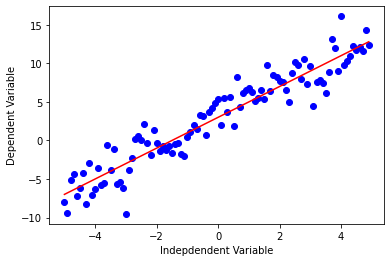

In [8]:
x = np.arange(-5.0, 5.0, 0.1) #Return evenly spaced values within a given interval.

##You can adjust the slope and intercept to verify the changes in the graph
y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise

plt.plot(x, ydata,  'bo') #plot x,y using blue circle markers
plt.plot(x,y, 'r')  #plot x,y using red circle markers
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

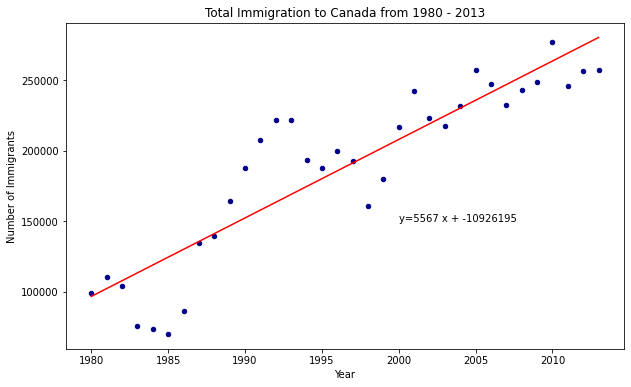

In [71]:
df_tot.plot(kind='scatter', x='year', y='total',figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

### Folium library
you can create a leaflet map, to create a Choropleth map, we need Geojson file which to define the countries' boundries. 

In [92]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

# define the world map
world_map = folium.Map()

#Let's create a map centered around Canada and play with the zoom level to see how it affects the rendered map.
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4, tiles='Mapbox Bright') #Stamen Toner bring it b&w, Stamen Terrain显示车道和分界线，Mapbox Bright brings names of countries

world_map

/bin/sh: conda: command not found


### Instance of creating maps

In [87]:
df_incidents = pd.read_csv('http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Police_Department_Incidents_-_Previous_Year__2016_.csv')

#Reduce the data
limit = 100
df_incidents = df_incidents.iloc[0:limit, :]
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [91]:
#visualize where these crimes took place in the city of San Francisco. We will use the default style and we will initialize the zoom level to 12.

sanfran_map = folium.Map(location=[37.77, -122.42], zoom_start=12)

incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
# add pop-up text to each marker on the map
latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)  

# add incidents to map
sanfran_map.add_child(incidents)

**Choropleth Maps** <br>
We are going to use Immigration to Canada as an instance here. In order to create a Choropleth map, we need a GeoJSON file that defines the areas/boundaries of the state, county, or country that we are interested in. 

In [102]:
# download countries geojson file
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json -O world_countries.json
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [106]:
#centered around [0, 0] latitude and longitude values, with an intial zoom level of 2, and using Mapbox Bright style.

world_geo = r'world_countries.json' # geojson file

# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')

# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo, #is the GeoJSON file
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name', #key or variable in the GeoJSON file that contains the name of the variable of interest. 
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada'
)

world_map

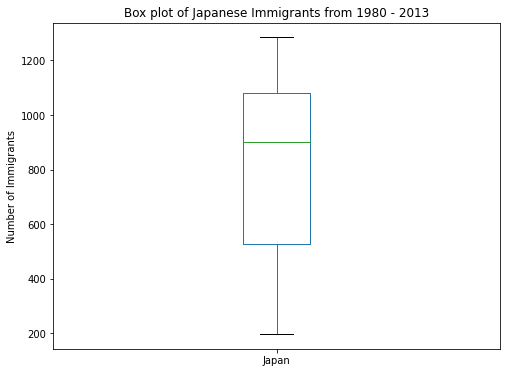

In [37]:
import matplotlib as mpl
import matplotlib.pyplot as plt 

# to get a dataframe, place extra square brackets around 'Japan'.
df_japan = df_can.loc[['Japan'],years].transpose()

df_japan.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()